In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [2]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [4]:
df.shape

(202, 26)

# Handling Missing Data:

In [5]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [6]:
df2=df.copy()

In [7]:
df2.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [8]:
#For missing in normalized-losses feature, I am replacing them with the mean of the column
mean_normalized_losses=df2['normalized-losses'].mean()
df2['normalized-losses'].fillna(mean_normalized_losses,inplace=True)
df2.head()

C:\Users\Rifat\AppData\Local\Temp\ipykernel_1856\3186021350.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['normalized-losses'].fillna(mean_normalized_losses,inplace=True)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.836364,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,121.836364,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,121.836364,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [9]:
# For number of doors, I am deleting the rows
df2.dropna(inplace=True)
df2.shape

(200, 26)

In [10]:
df2.to_csv('abc.csv')

In [11]:
# There is some valus as ? in the dataset
(df2=='?').sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
#Converting ? to suitable data
import numpy as np

number_cols = ['bore', 'stroke', 'horsepower', 'peak-rpm']

df2[number_cols] = df2[number_cols].replace('?', np.nan).apply(pd.to_numeric, errors='coerce') #Help of ai

# Using mean as data doesn't have high variation
for col in ['bore', 'stroke', 'peak-rpm']:
    df2[col].fillna(df2[col].mean(), inplace=True)

# Using median as this feature has high variation
df2['horsepower'].fillna(df2['horsepower'].median(), inplace=True)


(df2=='?').sum().sum()

C:\Users\Rifat\AppData\Local\Temp\ipykernel_1856\2871907420.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].fillna(df2[col].mean(), inplace=True)
C:\Users\Rifat\AppData\Local\Temp\ipykernel_1856\2871907420.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

np.int64(0)

In [13]:
# df2.to_csv('abc.csv')

# Feature Engineering

## Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Ordinal Encoding, help of ai
door_mapping = {'two': 2, 'four': 4}
cylinder_mapping = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df2['num-of-doors'] = df2['num-of-doors'].map(door_mapping)
df2['num-of-cylinders'] = df2['num-of-cylinders'].map(cylinder_mapping)

# Label Encoding 
categorical_cols = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']
for col in categorical_cols:
    df2[col] = label_encoder.fit_transform(df2[col])


df2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.836364,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,121.836364,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,121.836364,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.000000,1,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.000000,1,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [15]:
# df2.to_csv('abc.csv')

## New feature

In [16]:
df2.shape

(200, 26)

In [17]:
# The ratio of horsepower to curb weight.
df2['horsepower-to-curb-weight']=df2['horsepower'] / df2['curb-weight']
print(df2.shape)
df2.head(2)

(200, 27)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-to-curb-weight
0,3,121.836364,0,1,0,2,0,2,0,88.6,...,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495,0.043564
1,3,121.836364,0,1,0,2,0,2,0,88.6,...,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500,0.043564


In [18]:
#Volume and avg-mpg
df2['Area']=df2['height'] * df2['width'] * df2['length']
df2['avg-mpg']=(df2['city-mpg']+df2['highway-mpg'])/2

In [19]:
# Price/horsepower and price/avg-mpg
df2['price/horsepower']=df2['price']/df2['horsepower']
df2['price/avf-mpg']=df2['price']/df2['avg-mpg']

In [20]:
print(df2.shape)
df2.head(3)

(200, 31)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-to-curb-weight,Area,avg-mpg,price/horsepower,price/avf-mpg
0,3,121.836364,0,1,0,2,0,2,0,88.6,...,111.0,5000.0,21,27,13495,0.043564,528019.904,24.0,121.576577,562.291667
1,3,121.836364,0,1,0,2,0,2,0,88.6,...,111.0,5000.0,21,27,16500,0.043564,528019.904,24.0,148.648649,687.500000
2,1,121.836364,0,1,0,2,2,2,0,94.5,...,154.0,5000.0,19,26,16500,0.054552,587592.640,22.5,107.142857,733.333333


# EDA

In [21]:
df2.isnull().sum().sum()

np.int64(0)

In [22]:
df2.corr()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-to-curb-weight,Area,avg-mpg,price/horsepower,price/avf-mpg
symboling,1.000000,0.469703,-0.140770,0.187633,-0.072918,-0.674783,-0.600168,-0.063146,0.212027,-0.542657,...,0.069807,0.271340,-0.022785,0.047975,-0.091083,0.297924,-0.470176,0.013735,-0.235390,-0.065202
normalized-losses,0.469703,1.000000,-0.254528,0.101283,-0.024691,-0.369076,-0.255444,0.313495,0.000504,-0.060405,...,0.215961,0.234704,-0.220644,-0.178222,0.130225,0.256553,-0.097834,-0.200227,0.035413,0.130517
make,-0.140770,-0.254528,1.000000,-0.118200,0.098783,0.161382,0.098341,-0.032696,0.051258,0.079602,...,-0.068125,-0.207831,0.064225,0.058908,-0.160266,-0.113556,0.131395,0.061927,-0.131622,-0.180202
fuel-type,0.187633,0.101283,-0.118200,1.000000,-0.425213,-0.178075,-0.144346,-0.140319,0.039982,-0.308662,...,0.156823,0.472964,-0.248392,-0.179860,-0.114455,0.400348,-0.281524,-0.214638,-0.464417,-0.009102
aspiration,-0.072918,-0.024691,0.098783,-0.425213,1.000000,0.065194,0.073193,0.112282,-0.057817,0.282609,...,0.253977,-0.195238,-0.194665,-0.247224,0.197388,0.147124,0.275851,-0.223301,0.179903,0.140771
num-of-doors,-0.674783,-0.369076,0.161382,-0.178075,0.065194,1.000000,0.688248,-0.105438,-0.142079,0.454669,...,-0.096985,-0.229852,-0.038556,-0.056566,0.051398,-0.309381,0.481449,-0.048167,0.235705,0.020660
body-style,-0.600168,-0.255444,0.098341,-0.144346,0.073193,0.688248,1.000000,-0.155418,-0.278225,0.410785,...,-0.134895,-0.104435,0.008781,-0.026812,-0.068188,-0.319018,0.440978,-0.009608,0.082658,-0.073482
drive-wheels,-0.063146,0.313495,-0.032696,-0.140319,0.112282,-0.105438,-0.155418,1.000000,0.147621,0.471887,...,0.546073,-0.032747,-0.471884,-0.474747,0.590254,0.349784,0.399897,-0.476735,0.464373,0.542459
engine-location,0.212027,0.000504,0.051258,0.039982,-0.057817,-0.142079,-0.278225,0.147621,1.000000,-0.189673,...,0.342390,0.202098,-0.156393,-0.102028,0.329016,0.478387,-0.083834,-0.129326,0.135023,0.271582
wheel-base,-0.542657,-0.060405,0.079602,-0.308662,0.282609,0.454669,0.410785,0.471887,-0.189673,1.000000,...,0.373327,-0.351147,-0.479217,-0.550630,0.587573,-0.054589,0.916014,-0.519657,0.642646,0.564715


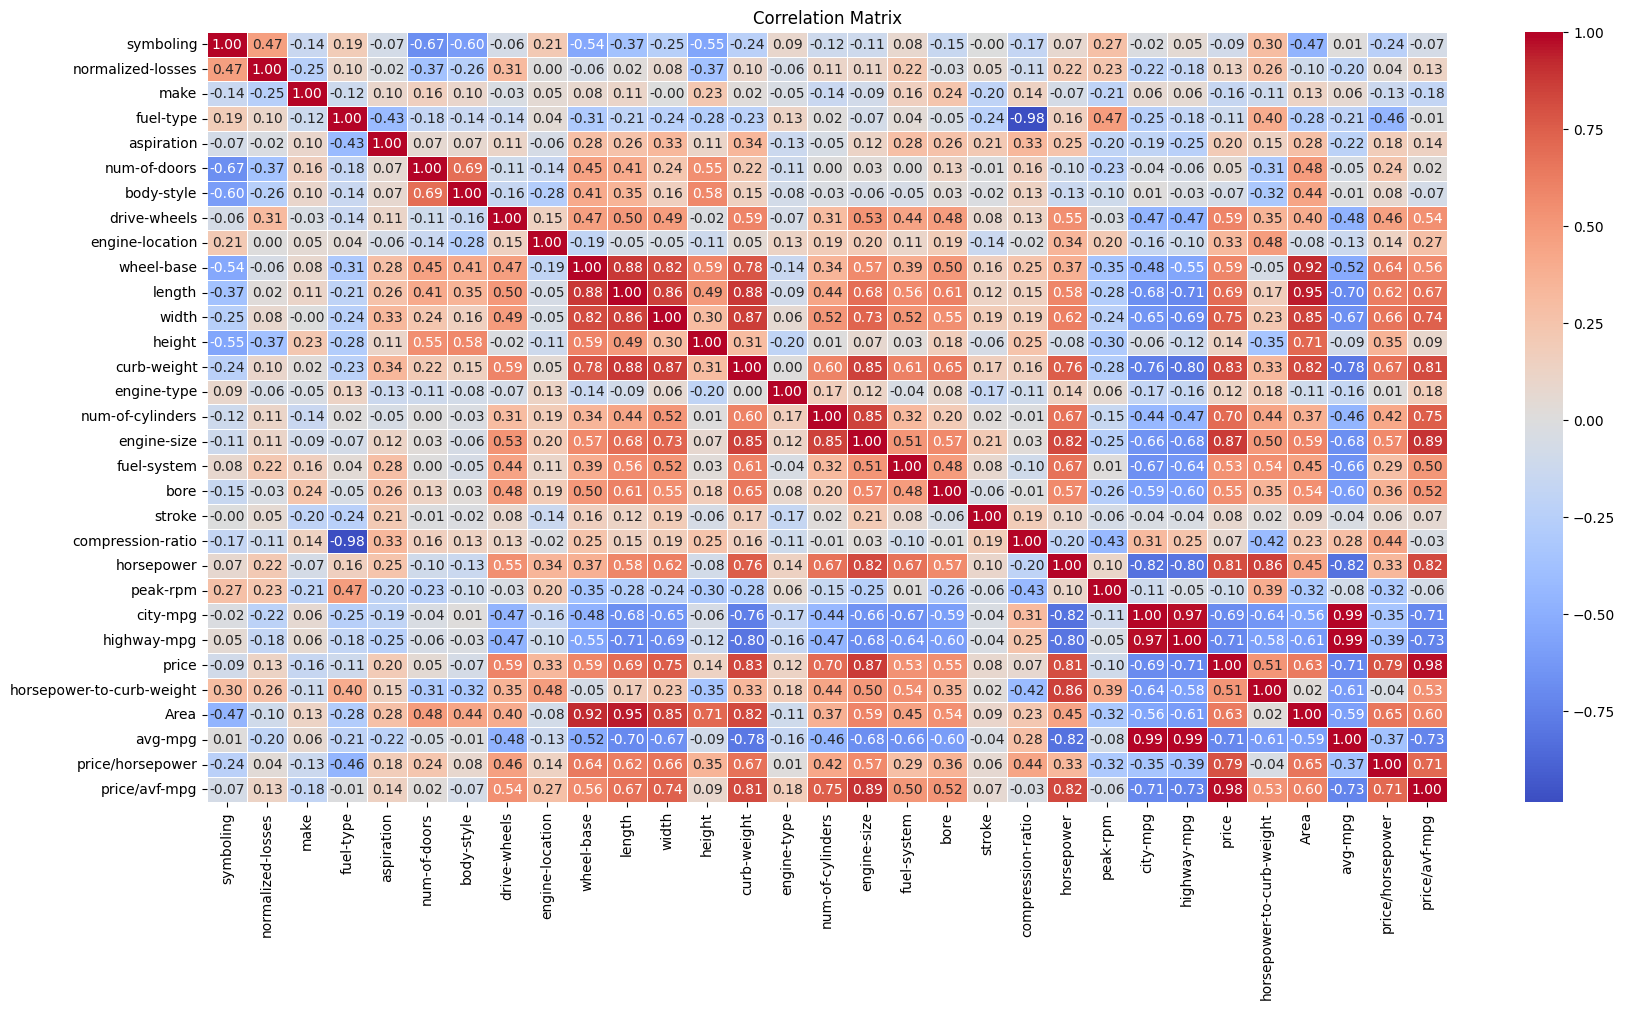

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 10))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [24]:
# My created features showing high corelation, this might create multicollinearity problem

# MODEL

## Train, test split

In [25]:
X=df2.drop(['price'],axis=1)
Y=df2['price']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

## LR

In [28]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [29]:
#Training accuracy
lr_train_score=lr.score(xtrain,ytrain)
lr_train_score

0.9972241174356867

In [30]:
#Testing accuracy
lr_test_score=lr.score(xtest,ytest)
lr_test_score

0.9884232806599103

In [31]:
#MSE for test data
from sklearn.metrics import mean_squared_error
lr_y_predict=lr.predict(xtest)
lr_mse=mean_squared_error(ytest,lr_y_predict)
lr_mse

np.float64(1238982.4992776697)

## KNN

In [32]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [33]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [34]:
#Training accuracy
knn_train_score=knn.score(xtrain,ytrain)
knn_train_score

0.6378734401751056

In [35]:
#Testing accuracy
knn_test_score=knn.score(xtest,ytest)
knn_test_score

0.3620214262106686

In [36]:
#MSE for test data
knn_y_predict=knn.predict(xtest)
knn_mse=mean_squared_error(ytest,knn_y_predict)
knn_mse

np.float64(68278781.28666666)

# Model evaluation

## Linear regression perform better from knn

As knn uses near point to calculate, the feature formation and encoding might have some effect in the bad performance of the model.